In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert


import obspy.signal
from obspy import read

%matplotlib inline

In [31]:
st1 = read('data/earthquake/st1.SAC')
st2 = read('data/earthquake/st2.SAC')
st3 = read('data/earthquake/st3.SAC')

threechannels = read('data/earthquake/st1.SAC')
threechannels += read('data/earthquake/st2.SAC')
threechannels += read('data/earthquake/st3.SAC')

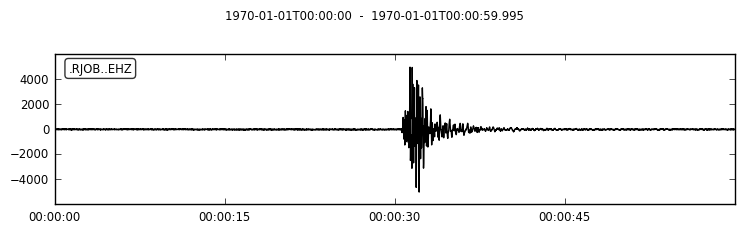

In [32]:
st3.plot()

In [33]:
data = st3[0].data
npts = st3[0].stats.npts
samprate = 1/st3[0].stats.sampling_rate

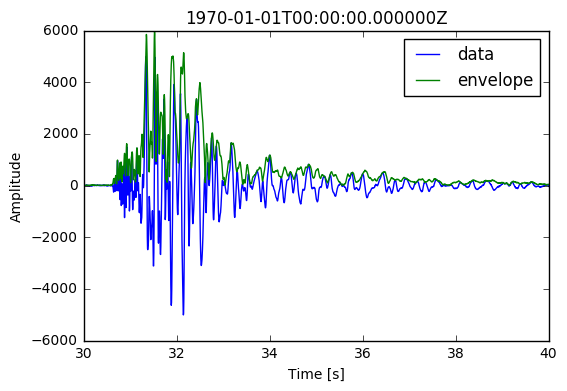

In [34]:
analytic_signal = hilbert(data)
amplitude_envelope = np.abs(analytic_signal)

# The plotting, plain matplotlib
t = np.arange(0, npts * samprate, samprate)
plt.plot(t, data, label ='data')
plt.plot(t, amplitude_envelope, label='envelope')
plt.title(st3[0].stats.starttime)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.xlim(30,40)
plt.legend()

In [35]:
len(amplitude_envelope)

12000

In [36]:
data_envelope = ((1-0.01)*(amplitude_envelope-np.min(amplitude_envelope))/(np.max(amplitude_envelope)-np.min(amplitude_envelope)))+0.01
t2 = np.arange(0, 120*samprate, samprate)

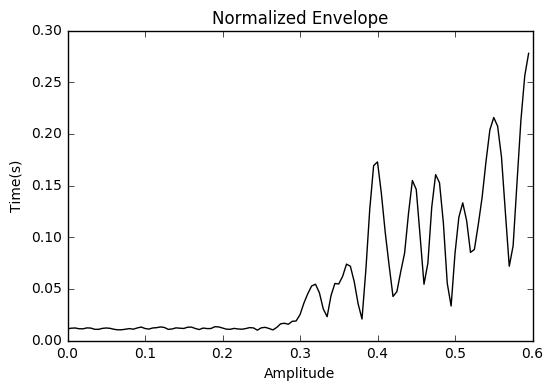

In [37]:
#p[6068:6188]

plt.title('Normalized Envelope')
plt.xlabel('Amplitude')
plt.ylabel('Time(s)')
plt.plot(t2,data_envelope[6066:6186],'k')

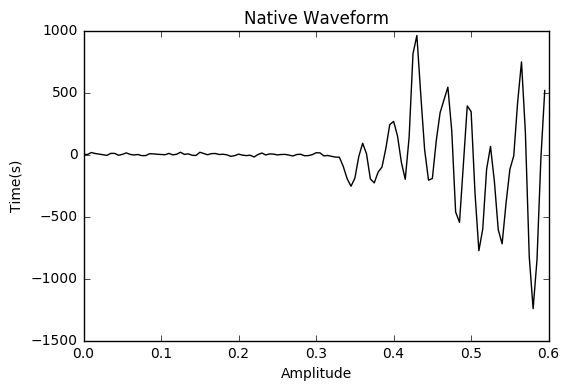

In [38]:
plt.title('Native Waveform')
plt.xlabel('Amplitude')
plt.ylabel('Time(s)')
plt.plot(t2,data[6060:6180],'k')

In [39]:
noise = []

for i in range(0,6000,60):
    noise.append(data_envelope[i:(i+120)])
noise = np.array(noise)



#add p
p_pick = data_envelope[6066:6186]
envelope = []
for i in np.linspace(0.1,0.9,100):
    envelope.append(i*p_pick)
envelope = np.array(envelope)

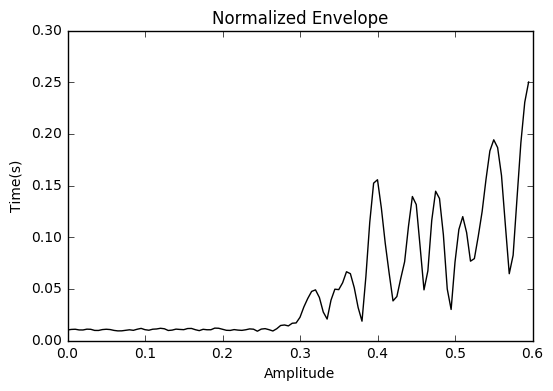

In [40]:
#check the training data

plt.title('Normalized Envelope')
plt.xlabel('Amplitude')
plt.ylabel('Time(s)')
plt.plot(t2,envelope[99],'k')

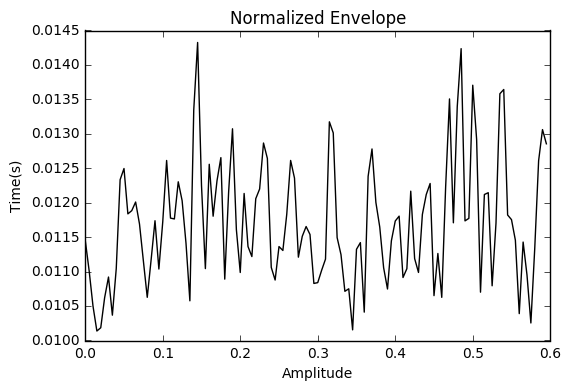

In [41]:
#check the noise
plt.title('Normalized Envelope')
plt.xlabel('Amplitude')
plt.ylabel('Time(s)')
plt.plot(t2,noise[99],'k')

In [42]:
#save the array to csv

#np.savetxt('noise_envelope.csv',noise,delimiter=';',fmt="%s")
#np.savetxt('p_envelope.csv',envelope,delimiter=';',fmt="%s")